# Decision Tree 과제

*사이킷런의 유방암 데이터셋을 사용합니다.*

## 1. 매개변수를 지정하지 않은 모델을 훈련시킨 후 이를 시각화로 나타내주세요. 
(데이터셋을 train test split 함수를 사용해 분리한 후, 모델을 훈련시킵니다.)

In [1]:
#@title 시각화를 위한 라이브러리 설치
!pip install mglearn

In [111]:
from os import system    # graphviz 라이브러리 설치하기 위해서

# graphviz 라이브러리 설치 // 아래 예제에서 오류나는 경우 anaconda prompt에서 설치
system("pip install graphviz")

# graphviz 사용에 있어서 error발생원인이 환경변수일 경우 환경변수 추가 필요
# 환경변수 추가 후 환경변수 설정 아래코드
# os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\' 

import graphviz
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')  # 그래프 테두리 모두 제거

#### 2. 데이터 분석

In [124]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

In [125]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [126]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [127]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


* DataFrame

In [128]:
col_names = list(cancer.feature_names)
col_names.append('target')

In [129]:
df = pd.DataFrame(np.c_[cancer.data,cancer.target], columns=col_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

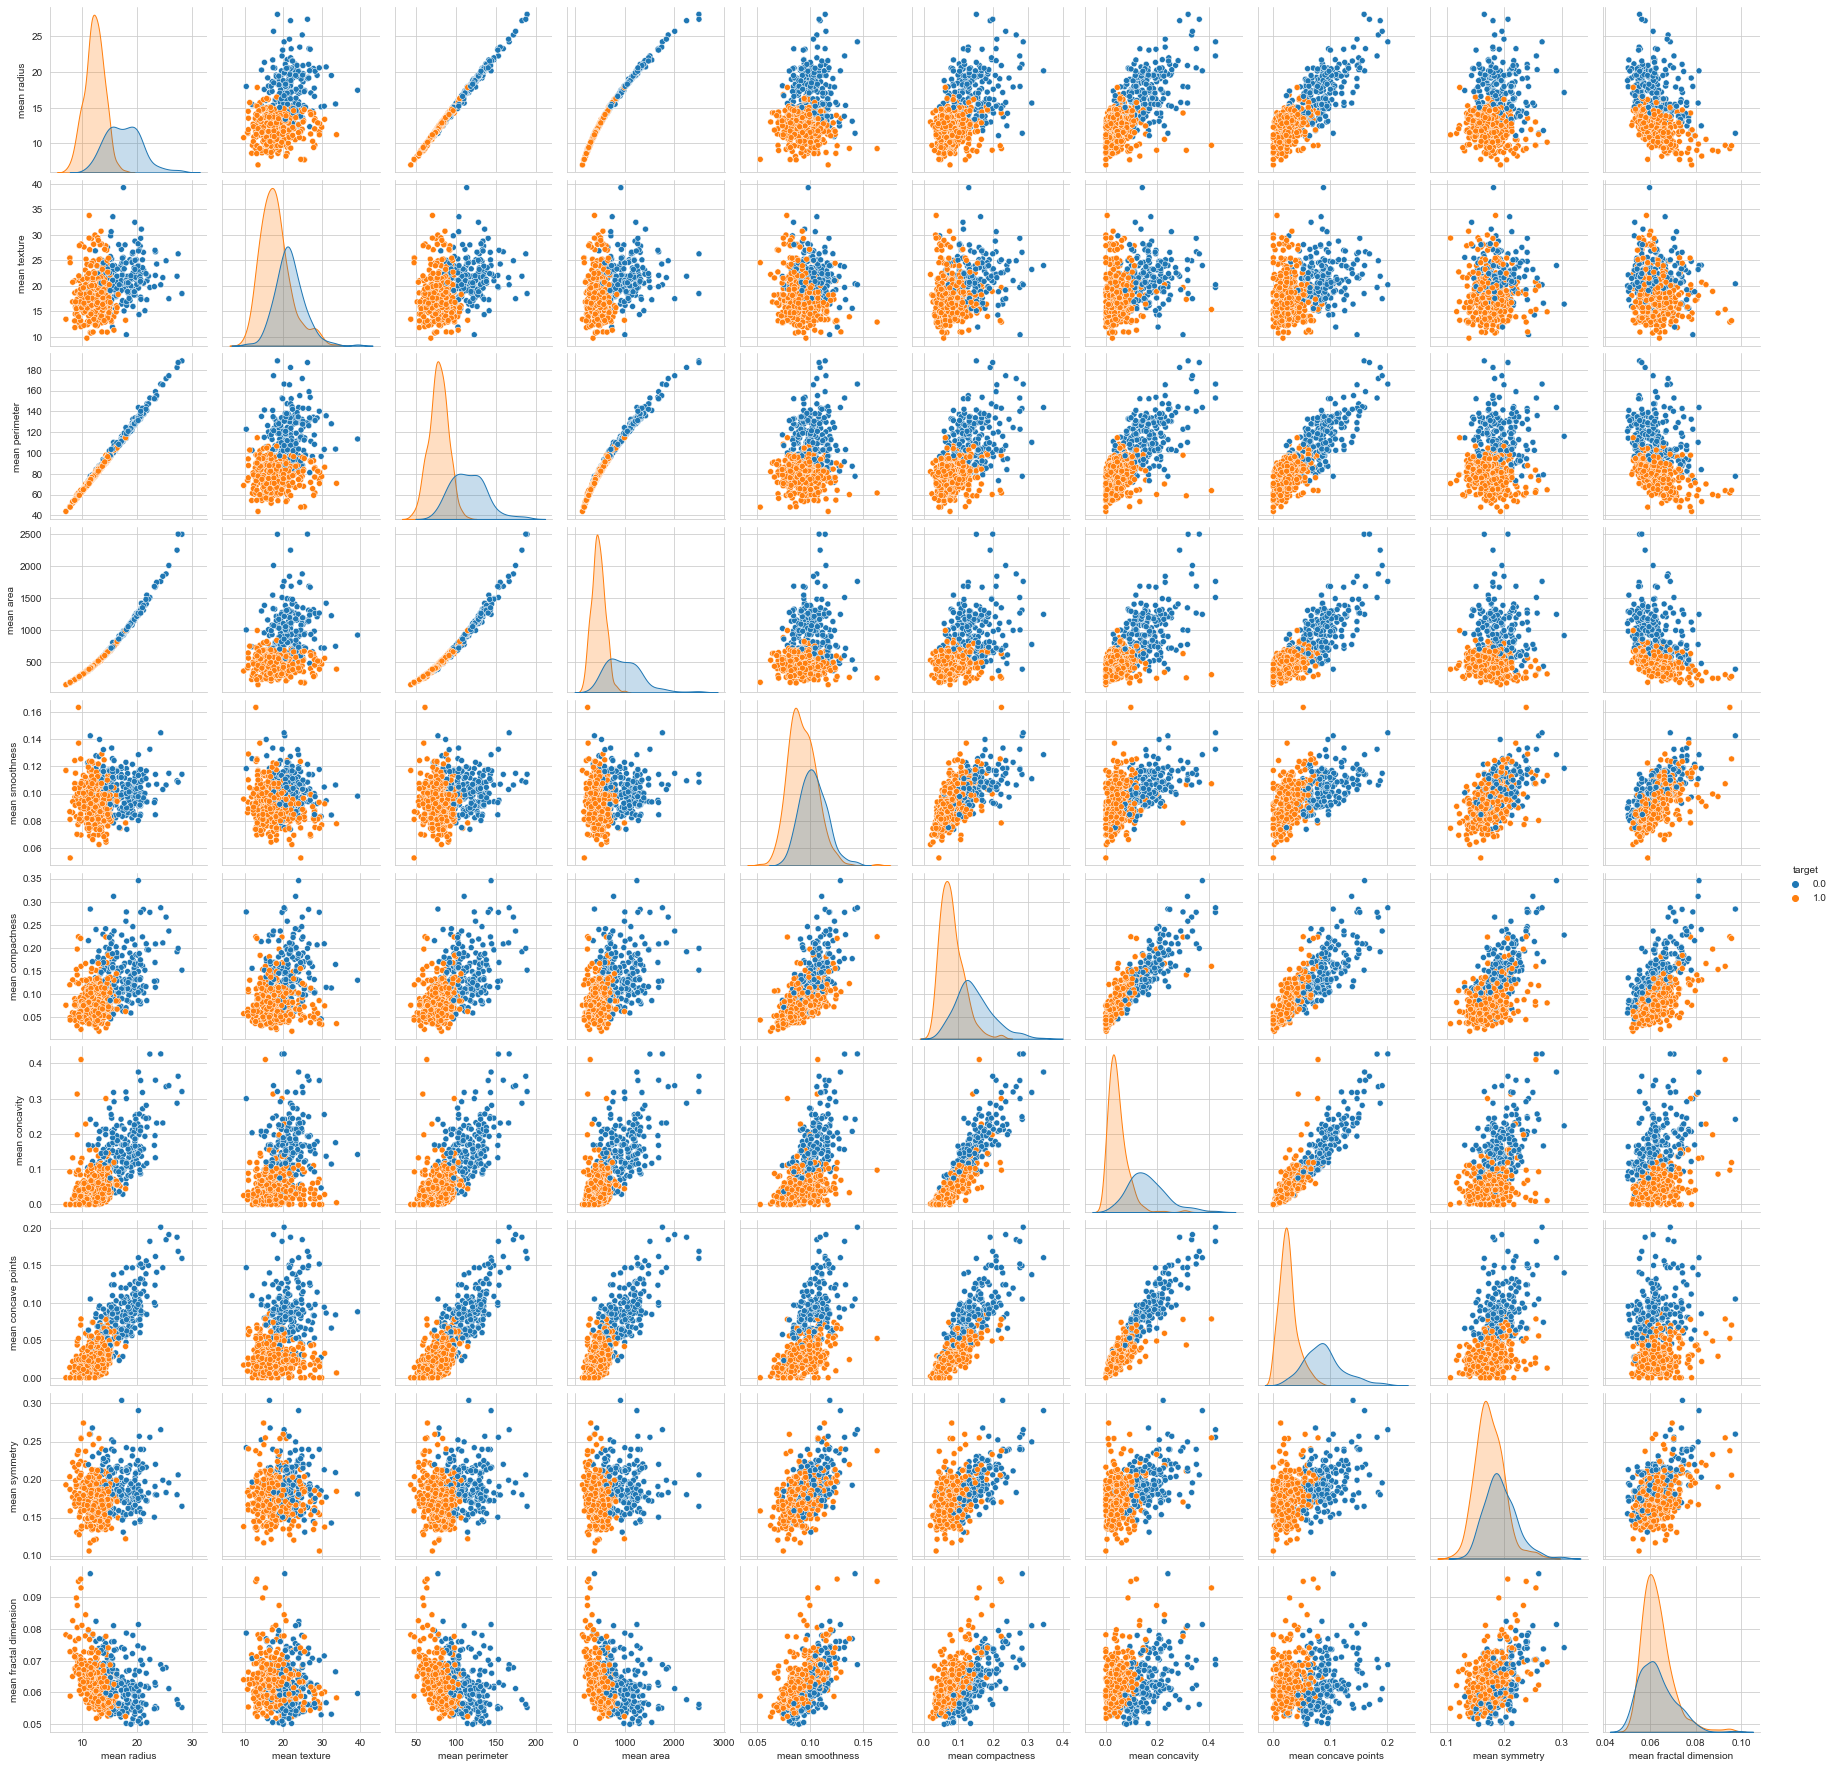

In [10]:
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']) 

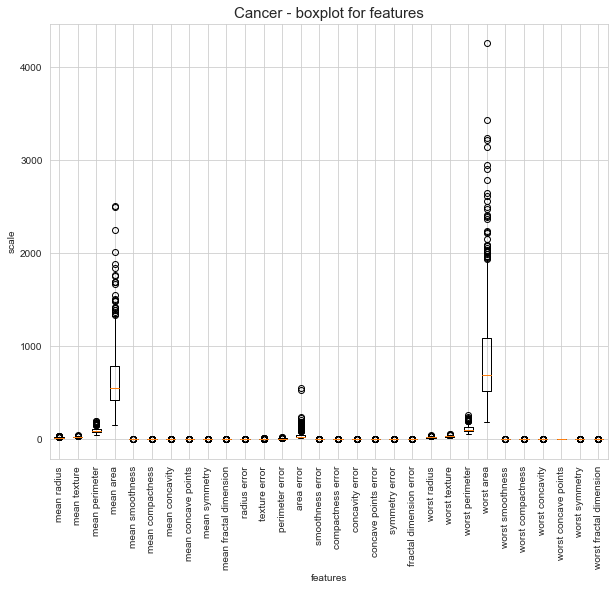

In [60]:
fig=plt.figure(figsize=[10,8])

plt.title('Cancer - boxplot for features',fontsize=15)

plt.boxplot(cancer.data)

plt.xticks(np.arange(30)+1,cancer.feature_names,rotation=90)

plt.xlabel('features')
plt.ylabel('scale')
print('')

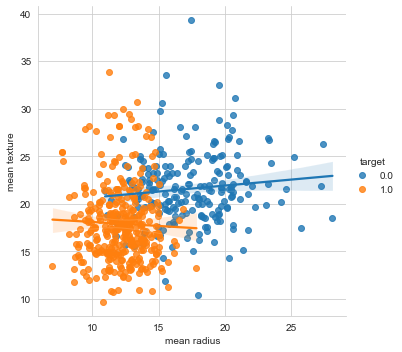

In [172]:
sns.lmplot(x = 'mean radius', y = 'mean texture', hue = 'target', data = df)

#### 3. train, test 분리

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [132]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


#### 4. 모델 만들기

* 파라미터 없이 모델

**1) SVM**

In [63]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)

print('SVM 학습용 데이터로 측정한 정확도 = %.2f' % svm.score(X_train, y_train))
print('SVM 시험용 데이터로 측정한 정확도 = %.2f' % svm.score(X_test, y_test))

SVM 학습용 데이터로 측정한 정확도 = 0.91
SVM 시험용 데이터로 측정한 정확도 = 0.95


**2) Decision Tree**

In [64]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

print('decision_tree 학습용 데이터로 측정한 정확도 = %.2f' % tree.score(X_train, y_train))
print('decision_tree 시험용 데이터로 측정한 정확도 = %.2f' % tree.score(X_test, y_test))

decision_tree 학습용 데이터로 측정한 정확도 = 1.00
decision_tree 시험용 데이터로 측정한 정확도 = 0.95


* 과대적합

#### 5. 시각화

* ROC 커브
* 이진 분류기의 성능을 표현하는 커브
* 가능한 모든 threshold에 대해 FPR과 TPR의 비율을 표현

In [65]:
clf_labels1 = ["SVM", "Decision Tree"]
all_clf1 = [svm, tree]

In [66]:
for clf, label in zip(all_clf1, clf_labels1) :
    scores = cross_val_score(estimator=clf,
                    X = X_train,
                    y = y_train,
                    cv = 10,
                    scoring ="roc_auc")
    print("ROC AUC : %.3f ( +/- %.3f) [%s]"
            % (scores.mean(), scores.std(), label))

ROC AUC : 0.971 ( +/- 0.024) [SVM]
ROC AUC : 0.913 ( +/- 0.056) [Decision Tree]


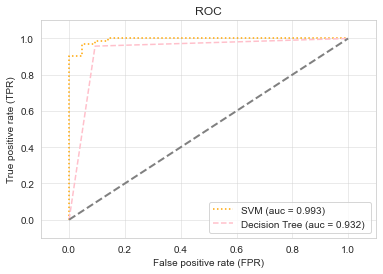

In [67]:
colors = ["orange", "pink"]
linestyles = [':', "--"]

for clf, label, clr, ls in zip(all_clf1, clf_labels1, colors, linestyles) :
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_true = y_test,
                                    y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)

    plt.plot(fpr, tpr, color = clr, linestyle = ls,
                label ="%s (auc = %.3f) " %(label, roc_auc))

plt.legend(loc = "lower right")
plt.plot([0,1], [0,1], linestyle = "--", color = "gray", linewidth = 2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])

plt.grid(alpha = 0.5)

plt.xlabel("False positive rate (FPR)")
plt.ylabel("True positive rate (TPR)")

plt.title("ROC")
plt.show()

===============Decision Tree 시각화==================


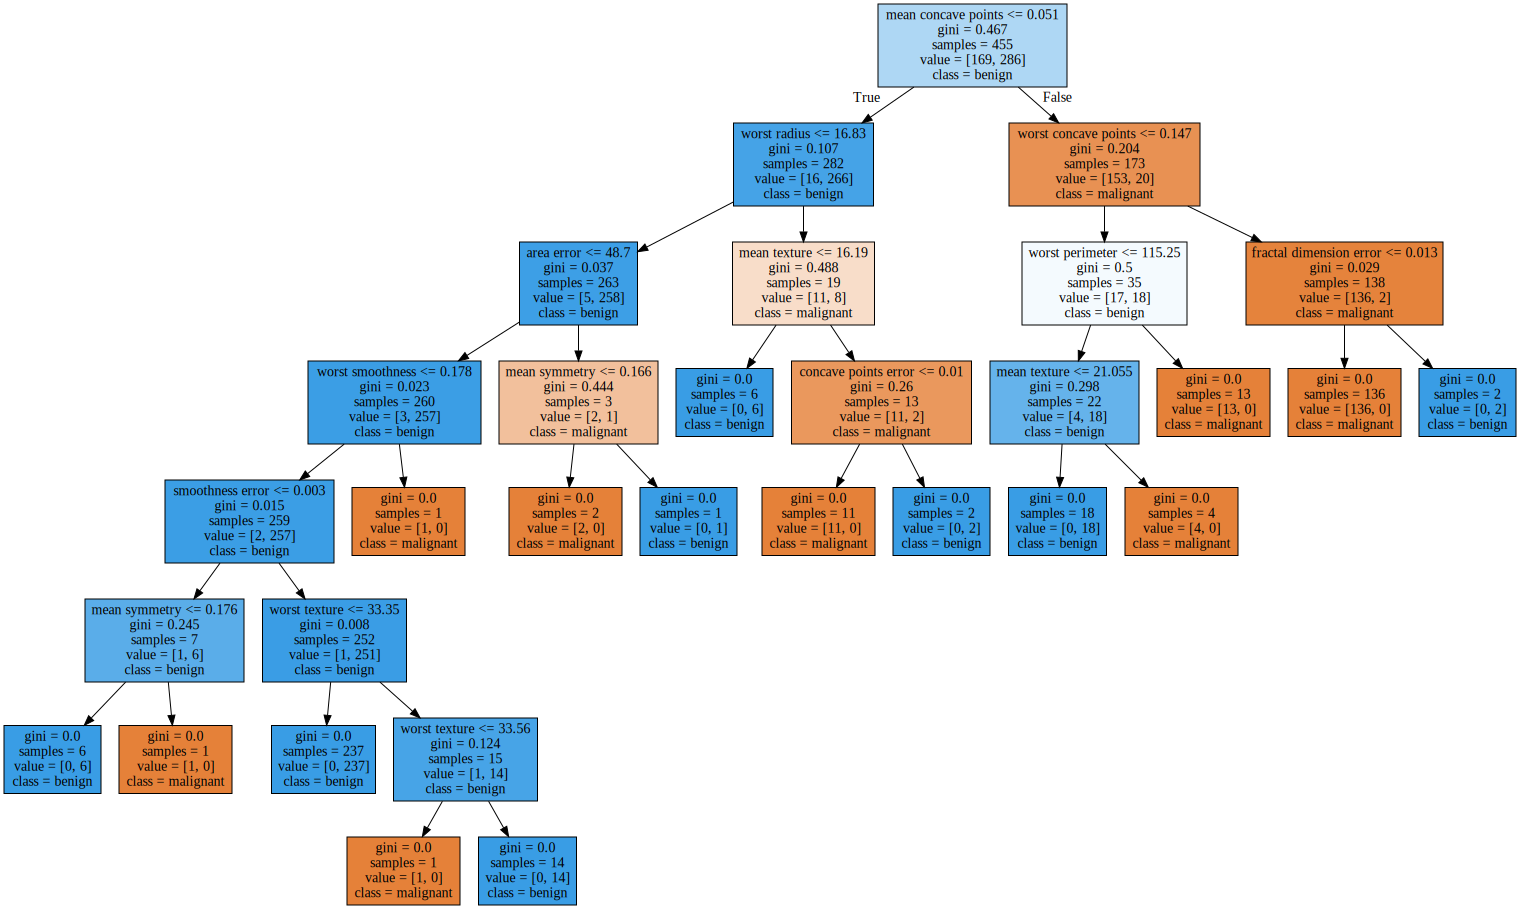

In [149]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(tree, out_file="tree.dot", class_names = cancer.target_names, 
                           feature_names = cancer.feature_names, impurity=True, filled=True)

print('===============Decision Tree 시각화==================')

# 위에서 생성된 grid_tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### 6. 정오 분류표

**1) SVM**

In [68]:
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("SVM")
print("잘못 분류된 샘플 개수 : %d" %(y_test != y_pred).sum())
print("정확도 : %.3f" % accuracy_score(y_test, y_pred))
print("정밀도 : %.3f" % precision_score(y_true = y_test, y_pred = y_pred))
print("재현율 : %.3f" % recall_score(y_true=y_test, y_pred=y_pred))
print("F1 : %.3f" % f1_score(y_true=y_test, y_pred=y_pred))

SVM
잘못 분류된 샘플 개수 : 6
정확도 : 0.947
정밀도 : 0.922
재현율 : 1.000
F1 : 0.959


**2) Decision Tree**

In [69]:
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

print("Decision Tree")
print("잘못 분류된 샘플 개수 : %d" %(y_test != y_pred).sum())
print("정확도 : %.3f" % accuracy_score(y_test, y_pred))
print("정밀도 : %.3f" % precision_score(y_true = y_test, y_pred = y_pred))
print("재현율 : %.3f" % recall_score(y_true=y_test, y_pred=y_pred))
print("F1 : %.3f" % f1_score(y_true=y_test, y_pred=y_pred))

Decision Tree
잘못 분류된 샘플 개수 : 8
정확도 : 0.930
정밀도 : 0.957
재현율 : 0.930
F1 : 0.943


## 2. 적절한 매개변수를 지정해 모델을 다시 훈련시키고 이를 시각화한 후, 위 그림과 어떻게 달라졌는지 설명해주세요. 
매개변수를 직접 지정해도 되고, 이전에 배운 GridSearchCV를 사용하셔도 좋습니다. 

#### 1. 모델 만들기 

* GridSearchCV로 파라미터 넣기

##### 1) SVM

In [100]:
# 그리드 서치에 파이프라인 적용하기

pipline = Pipeline([('scaler',MinMaxScaler()), ('svm', SVC(probability=True)) ])

pipline.fit(X_train, y_train)

print('테스트점수 :{:.2f}'.format(pipline.score(X_test, y_test)))

테스트점수 :0.97


In [101]:
params = {
            'svm__C'     : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
            'svm__gamma' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000] 
         }

grid_svm = GridSearchCV(pipline, param_grid = params, cv = 5)
grid_svm.fit(X_train, y_train)

print('최상의 교차검증 정확도 {:.2f}'.format(grid_svm.best_score_))
print('테스트 점수 {:.2f}'.format(grid_svm.score(X_test, y_test)))
print('최적의 매개변수 : {}'.format(grid_svm.best_params_))

최상의 교차검증 정확도 0.98
테스트 점수 0.98
최적의 매개변수 : {'svm__C': 10, 'svm__gamma': 1}


##### 2) Decision Tree

In [94]:
params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24],
    'min_samples_split' : [16, 24]
}

grid_dt = GridSearchCV(tree, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_dt.fit(X_train, y_train)

print('최상의 교차검증 정확도 {:.2f}'.format(grid_dt.best_score_))
print('테스트 점수 {:.2f}'.format(grid_dt.score(X_test, y_test)))
print('최적의 매개변수 : {}'.format(grid_dt.best_params_))

Fitting 5 folds for each of 14 candidates, totalling 70 fits
최상의 교차검증 정확도 0.93
테스트 점수 0.94
최적의 매개변수 : {'max_depth': 8, 'min_samples_split': 16}


#### 2. 시각화

In [102]:
clf_labels2 = ["SVM +params", "Decision Tree +params"]
all_clf2 = [grid_svm, grid_dt]

In [103]:
for clf, label in zip(all_clf2, clf_labels2) :
    scores = cross_val_score(estimator=clf,
                    X = X_train,
                    y = y_train,
                    cv = 10,
                    scoring ="roc_auc")
    print("ROC AUC : %.3f ( +/- %.3f) [%s]"
            % (scores.mean(), scores.std(), label))

ROC AUC : 0.993 ( +/- 0.016) [SVM +params]
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
ROC AUC : 0.949 ( +/- 0.047) [Decision Tree +params]


Fitting 5 folds for each of 14 candidates, totalling 70 fits


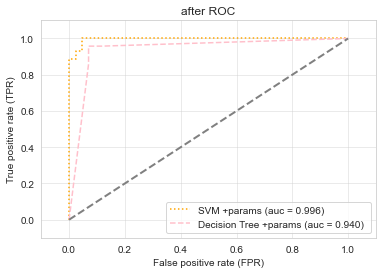

In [104]:
colors = ["orange", "pink"]
linestyles = [':', "--"]

for clf, label, clr, ls in zip(all_clf2, clf_labels2, colors, linestyles) :
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_true = y_test,
                                    y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)

    plt.plot(fpr, tpr, color = clr, linestyle = ls,
                label ="%s (auc = %.3f) " %(label, roc_auc))

plt.legend(loc = "lower right")
plt.plot([0,1], [0,1], linestyle = "--", color = "gray", linewidth = 2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])

plt.grid(alpha = 0.5)

plt.xlabel("False positive rate (FPR)")
plt.ylabel("True positive rate (TPR)")

plt.title("after ROC")
plt.show()

+) decision Tree

===============Decision Tree 시각화==================


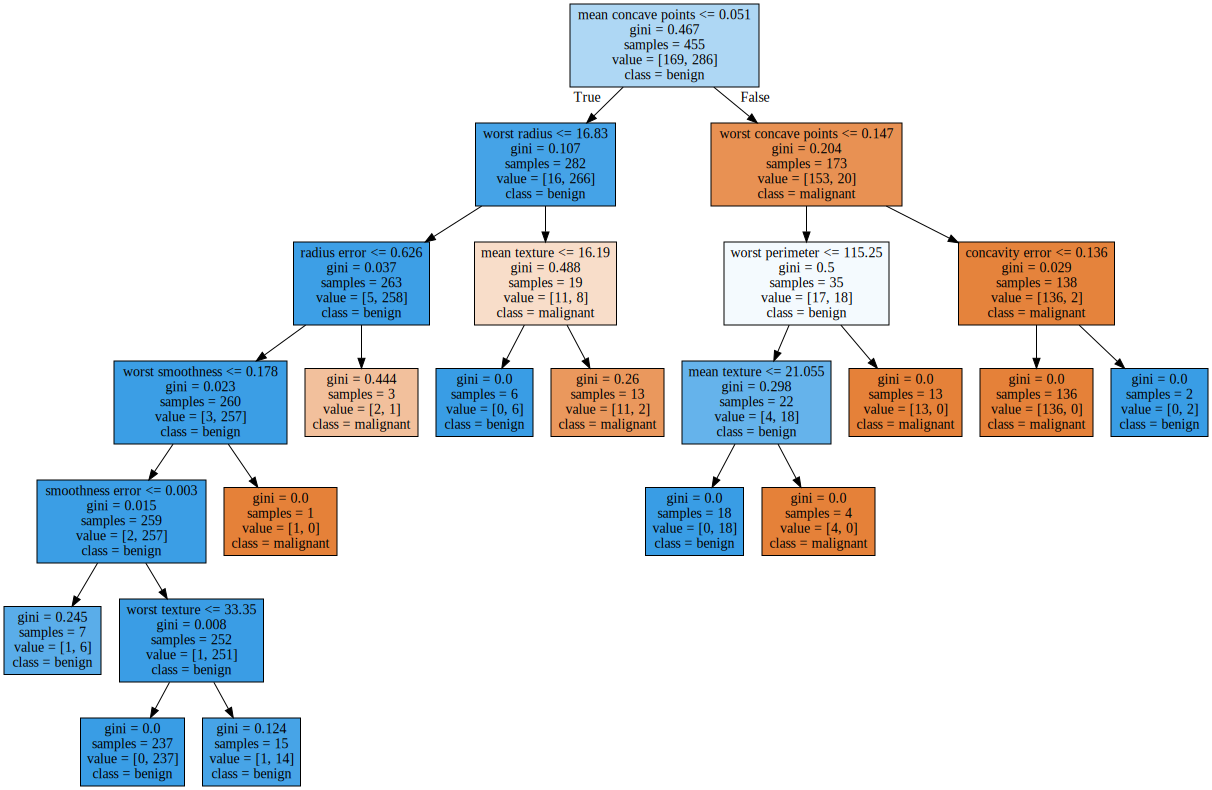

In [116]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(grid_dt.best_estimator_, out_file="grid_tree.dot", class_names = cancer.target_names, 
                           feature_names = cancer.feature_names, impurity=True, filled=True)

print('===============Decision Tree 시각화==================')

# 위에서 생성된 grid_tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("grid_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## 3. 모델을 평가하는 다양한 지표를 사용해 모델을 평가해주세요.

 (accuracy, loss, 오차행렬, f1 score, recall, cross validation 등등 자유롭게 선택)

#### 1. classification_report

##### 1) SVM

In [142]:
# 분석결과 확인
y_pred1 = grid_svm.predict(X_test)

svm_report = classification_report(y_test, y_pred1)
print(svm_report)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [146]:
print("svm_report")
print("잘못 분류된 샘플 개수 : %d" %(y_test != y_pred1).sum())
print("정확도 : %.3f" % accuracy_score(y_test, y_pred1))
print("정밀도 : %.3f" % precision_score(y_true = y_test, y_pred = y_pred1))
print("재현율 : %.3f" % recall_score(y_true=y_test, y_pred=y_pred1))
print("F1 : %.3f" % f1_score(y_true=y_test, y_pred=y_pred1))

svm_report
잘못 분류된 샘플 개수 : 2
정확도 : 0.982
정밀도 : 0.973
재현율 : 1.000
F1 : 0.986


##### 2) Decision Tree

In [147]:
# 분석결과 확인
y_pred2 = grid_dt.predict(X_test)

dt_report = classification_report(y_test, y_pred2)
print(dt_report)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.94      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



In [148]:
print("dt_report")
print("잘못 분류된 샘플 개수 : %d" %(y_test != y_pred2).sum())
print("정확도 : %.3f" % accuracy_score(y_test, y_pred2))
print("정밀도 : %.3f" % precision_score(y_true = y_test, y_pred = y_pred2))
print("재현율 : %.3f" % recall_score(y_true=y_test, y_pred=y_pred2))
print("F1 : %.3f" % f1_score(y_true=y_test, y_pred=y_pred2))

dt_report
잘못 분류된 샘플 개수 : 7
정확도 : 0.939
정밀도 : 0.957
재현율 : 0.944
F1 : 0.950


#### 2. confusion matrix

##### 1) SVM

In [144]:
# 오차행렬인 컴퓨전 메트릭스 확인

svm_matrix = confusion_matrix(y_test, y_pred1)
print(svm_matrix)

[[41  2]
 [ 0 71]]


##### 2) Decision Tree

In [145]:
# 오차행렬인 컴퓨전 메트릭스 확인

dt_matrix = confusion_matrix(y_test, y_pred2)
print(dt_matrix)

[[40  3]
 [ 4 67]]


#### 3. 특성 중요도

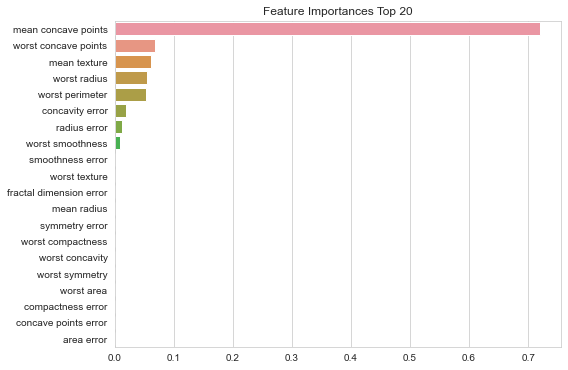

In [138]:
import seaborn as sns

best_df_clf = grid_dt.best_estimator_
feature_importance_values = best_df_clf.feature_importances_

# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=X.columns)

# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()